In [39]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [167]:
pip install -U xgboost

Note: you may need to restart the kernel to use updated packages.


In [203]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC  
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [204]:
train = pd.read_csv("train.csv")

In [205]:
event_type = pd.read_csv("event_type.csv")

In [206]:
log_feature = pd.read_csv("log_feature.csv")

In [207]:
resource_type = pd.read_csv("resource_type.csv")

In [208]:
severity_type=pd.read_csv("severity_type.csv")

In [298]:
test = pd.read_csv("test.csv")

In [300]:
test.shape

(11171, 2)

In [211]:
train.isnull().sum()

id                0
location          0
fault_severity    0
dtype: int64

In [212]:
event_type.isnull().sum()

id            0
event_type    0
dtype: int64

In [213]:
log_feature.isnull().sum()

id             0
log_feature    0
volume         0
dtype: int64

In [214]:
resource_type.isnull().sum()

id               0
resource_type    0
dtype: int64

In [215]:
df = pd.merge(train,event_type,on = ['id'])

In [216]:
df1 = pd.merge(df,log_feature,on=['id'])

In [217]:
df2=pd.merge(df1,resource_type,on=['id'])

In [218]:
df3=pd.merge(df2,severity_type,on=['id'])

### ID is being repeated 

In [219]:
df3.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2,severity_type 2
1,14121,location 118,1,event_type 34,feature 232,19,resource_type 2,severity_type 2
2,14121,location 118,1,event_type 35,feature 312,19,resource_type 2,severity_type 2
3,14121,location 118,1,event_type 35,feature 232,19,resource_type 2,severity_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2,severity_type 2


### So we drop duplicates and take only unique values

In [220]:
df=df3.drop_duplicates(subset=['id'])

In [221]:
df.shape

(7381, 8)

In [222]:
test.shape

(11171, 2)

In [223]:
df.dtypes

id                 int64
location          object
fault_severity     int64
event_type        object
log_feature       object
volume             int64
resource_type     object
severity_type     object
dtype: object

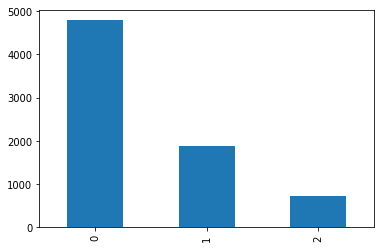

In [224]:
df.fault_severity.value_counts().plot(kind = 'bar')

From above graph we see there is a class imbalance so we do SMOTE for removing it

We need to convert all columns into numeric type

In [225]:
df.columns

Index(['id', 'location', 'fault_severity', 'event_type', 'log_feature',
       'volume', 'resource_type', 'severity_type'],
      dtype='object')

In [226]:
df.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,location 118,1,event_type 34,feature 312,19,resource_type 2,severity_type 2
4,9320,location 91,0,event_type 34,feature 315,200,resource_type 2,severity_type 2
8,14394,location 152,1,event_type 35,feature 221,1,resource_type 2,severity_type 2
12,8218,location 931,1,event_type 15,feature 80,9,resource_type 8,severity_type 1
18,14804,location 120,0,event_type 34,feature 134,1,resource_type 2,severity_type 1


In [232]:
cat_col=['location', 'event_type', 'severity_type', 'log_feature','resource_type']

In [231]:
def categorical_conversion(df,cat_col):
    for i in range(len(cat_col)):
        df[cat_col[i]]=df[cat_col[i]].astype('category')
    return df

In [238]:
def label_encoding_conversion(df,cat_col):
    le=LabelEncoder()
    for i in range(len(cat_col)):
        df[cat_col[i]]=le.fit_transform(df[cat_col[i]])
    return df

In [239]:
df=categorical_conversion(df,cat_col)   


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [241]:
df=label_encoding_conversion(df,cat_col)


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [252]:
df.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,131,1,22,143,19,2,1
4,9320,850,0,22,146,200,2,1
8,14394,163,1,23,88,1,2,1
12,8218,870,1,5,211,9,8,0
18,14804,134,0,22,21,1,2,0


In [242]:
df.fault_severity.unique()

array([1, 0, 2], dtype=int64)

In [243]:
df.fault_severity.value_counts()

0    4784
1    1871
2     726
Name: fault_severity, dtype: int64

In [244]:
X = np.array(df.ix[:, df.columns != 'fault_severity'])
y = np.array(df.ix[:, df.columns == 'fault_severity'])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [245]:
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (7381, 7)
Shape of y: (7381, 1)


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


In [247]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (5166, 7)
Number transactions y_train dataset:  (5166, 1)
Number transactions X_test dataset:  (2215, 7)
Number transactions y_test dataset:  (2215, 1)


In [253]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train==2)))


Before OverSampling, counts of label '1': [1306]
Before OverSampling, counts of label '0': [3354] 

Before OverSampling, counts of label '2': [506]


In [254]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [255]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
print("Before OverSampling, counts of label '2': {}".format(sum(y_train_res==2)))


After OverSampling, counts of label '1': 3354
After OverSampling, counts of label '0': 3354
Before OverSampling, counts of label '2': 3354


In [256]:
X_train_res.shape

(10062, 7)

In [257]:
y_train_res.shape

(10062,)

##  Model Making

In [258]:
seed = 100
X_train, X_val, y_train, y_val = train_test_split(X_train_res, y_train_res, test_size=0.15, random_state=seed)
X_train.shape, X_val.shape, y_train.shape, y_val.shape 

((8552, 7), (1510, 7), (8552,), (1510,))

In [259]:
dtcl = DecisionTreeClassifier(criterion = 'entropy', random_state=seed)
etcl = ExtraTreesClassifier(criterion = 'gini', random_state=seed)
#lrcl = LogisticRegression(random_state=seed)
rfcl = RandomForestClassifier(random_state=seed)
nbcl = GaussianNB()
bgcl = BaggingClassifier(base_estimator=dtcl, n_estimators=50 , random_state=seed)
xgb = XGBClassifier(booster='gbtree',
                    gamma=0.01,
                    learning_rate = 0.01,
                    max_depth = 6,
                    min_child_weight= 1,
                    n_estimators= 100,
                    subsample= 0.5,
                    random_state= seed)
ada = AdaBoostClassifier(algorithm = 'SAMME.R',
                         learning_rate= 0.001,
                         n_estimators = 200, random_state=seed)

In [260]:
enclf = VotingClassifier(estimators = [('dt', dtcl), ('et', etcl), ('rf', rfcl), ('nb', nbcl), ('bg', bgcl), ('xgb',xgb) ,('ada',ada)], voting = 'soft')
enclf.fit(X_train, y_train)
y_predict = enclf.predict(X_val)
model_score = enclf.score(X_val, y_val)
print("Prediction on train dataset")
print('Accuracy  = %0.3f' % (model_score*100),"%")
y_pred_proba = enclf.predict_proba(X_val)[:,1]
#print('Area under curve = %0.3f' % (roc_auc_score(y_val,y_pred_proba)*100),"%")

D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
D:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Prediction on train dataset
Accuracy  = 78.344 %


In [261]:
test.head()

,id,location
0,11066,location 481
1,18000,location 962
2,16964,location 491
3,4795,location 532
4,3392,location 600


In [262]:
test["id"].values

array([11066, 18000, 16964, ...,  2374,  7277,  9886], dtype=int64)

### test Data

In [363]:
test_merge1=merge_fn(test,event_type.drop_duplicates(subset=['id']),'id','left')
test_merge2=merge_fn(test_merge1,severity_type.drop_duplicates(subset=['id']),'id','left')
test_merge3=merge_fn(test_merge2,log_feature.drop_duplicates(subset=['id']),'id','left')
test_merge4=merge_fn(test_merge3,resource_type.drop_duplicates(subset=['id']),'id','left')

In [364]:
test_merge4.shape

(11171, 7)

In [365]:
test_merge4.head()

,id,location,event_type,severity_type,log_feature,volume,resource_type
0,11066,location 481,event_type 35,severity_type 2,feature 230,24,resource_type 2
1,18000,location 962,event_type 11,severity_type 1,feature 203,9,resource_type 8
2,16964,location 491,event_type 35,severity_type 2,feature 235,10,resource_type 2
3,4795,location 532,event_type 27,severity_type 5,feature 240,1,resource_type 3
4,3392,location 600,event_type 15,severity_type 2,feature 82,6,resource_type 8


In [366]:
test_merge4.columns

Index(['id', 'location', 'event_type', 'severity_type', 'log_feature',
       'volume', 'resource_type'],
      dtype='object')

In [367]:
cat_col=['location', 'event_type', 'severity_type', 'log_feature','resource_type']

In [368]:
def categorical_conversion(test_merge4,cat_col):
    for i in range(len(cat_col)):
        test_merge4[cat_col[i]]=test_merge4[cat_col[i]].astype('category')
    return test_merge4

In [369]:
def label_encoding_conversion(test_merge4,cat_col):
    le=LabelEncoder()
    for i in range(len(cat_col)):
        test_merge4[cat_col[i]]=le.fit_transform(test_merge4[cat_col[i]])
    return test_merge4

In [370]:
test_merge4=categorical_conversion(test_merge4,cat_col)  


In [371]:
test_merge4=label_encoding_conversion(test_merge4,cat_col)

In [372]:
test_merge4.shape

(11171, 7)

In [373]:
test_merge4.head()

,id,location,event_type,severity_type,log_feature,volume,resource_type
0,11066,511,25,1,106,24,2
1,18000,999,2,0,84,9,8
2,16964,521,25,1,111,10,2
3,4795,559,17,4,115,1,3
4,3392,621,6,1,235,6,8


In [374]:
X_train

array([[15164,   504,    11, ...,     2,     5,     0],
       [ 2394,   894,     1, ...,     1,     8,     0],
       [15342,   443,    22, ...,     1,     2,     1],
       ...,
       [11789,   608,    30, ...,    12,     2,     0],
       [ 5862,   604,    22, ...,     2,     3,     0],
       [10361,   257,    15, ...,     2,     2,     0]], dtype=int64)

In [375]:
test_merge4=test_merge4.drop(['fault_severity'],axis=1)

KeyError: "['fault_severity'] not found in axis"

In [376]:
test_merge4.columns

Index(['id', 'location', 'event_type', 'severity_type', 'log_feature',
       'volume', 'resource_type'],
      dtype='object')

In [377]:
test_merge4.columns=['f0','f1','f2','f3','f4','f5','f6']

In [378]:
y_predict=enclf.predict(test_merge4)

In [379]:
test_merge4.shape

(11171, 7)

In [315]:
test_merge4.head()

,f0,f1,f2,f3,f4,f5,f6
0,14121,131,22,143,19,2,1
4,9320,850,22,146,200,2,1
8,14394,163,23,88,1,2,1
12,8218,870,5,211,9,8,0
18,14804,134,22,21,1,2,0


In [286]:
df.head()

,id,location,fault_severity,event_type,log_feature,volume,resource_type,severity_type
0,14121,131,1,22,143,19,2,1
4,9320,850,0,22,146,200,2,1
8,14394,163,1,23,88,1,2,1
12,8218,870,1,5,211,9,8,0
18,14804,134,0,22,21,1,2,0


In [297]:
test.shape

(11171, 2)

In [381]:
y_predict.shape

(11171,)

In [395]:
sub1 = pd.DataFrame()
sub1["ID"] = test["id"]
sub1['Class'] = y_predict
sub1.to_csv("Telstra.csv", index = False)
sub1.head()

,ID,Class
0,11066,0
1,18000,0
2,16964,0
3,4795,0
4,3392,0


In [433]:
predict_0=sub1[sub1['Class']==0]
predict_1=sub1[sub1['Class']==1]
predict_2=sub1[sub1['Class']==2]

In [441]:
sub_merged1=pd.merge(sub1,predict_0,how='left',on='ID')

In [442]:
sub_merged1.shape

(11171, 3)

In [443]:
sub_merged2=pd.merge(sub_merged1,predict_1,how='left',on='ID')

In [444]:
sub_merged3=pd.merge(sub_merged2,predict_2,how='left',on='ID')

In [445]:
sub_merged3.shape

(11171, 5)

In [446]:
sub_merged3.head()

,ID,Class_x,Class_y,Class_x,Class_y
0,11066,0,0.0,NaN,NaN
1,18000,0,0.0,NaN,NaN
2,16964,0,0.0,NaN,NaN
3,4795,0,0.0,NaN,NaN
4,3392,0,0.0,NaN,NaN


In [447]:
sub_merged3.fillna(0, inplace=True)

In [448]:
sub_merged3.head()

,ID,Class_x,Class_y,Class_x,Class_y
0,11066,0,0.0,0.0,0.0
1,18000,0,0.0,0.0,0.0
2,16964,0,0.0,0.0,0.0
3,4795,0,0.0,0.0,0.0
4,3392,0,0.0,0.0,0.0


In [458]:
sub_merged3.columns=['id','Class','predict_0','predict_1','predict_2']

In [474]:

sub_merged_final=sub_merged3[['id','Class','predict_0','predict_1','predict_2']].astype(int)

In [476]:
sub_merged_final.head()

,id,Class,predict_0,predict_1,predict_2
0,11066,0,0,0,0
1,18000,0,0,0,0
2,16964,0,0,0,0
3,4795,0,0,0,0
4,3392,0,0,0,0


In [477]:
sub_merged_final.to_csv('TelstraSubFinal.csv',index=False,header=True)